<font color='lime'>

# Model training and parameter selection with Grid Search

</font> 

<font color='yellow'>

## Support Vector Machine (SVM)

</font> 

<font color='orange'>

### Load the data

</font> 

In [3]:
import pandas as pd

file_path = 'data/spotify_songs_with_mood.csv'
data = pd.read_csv(file_path)

<font color='orange'>

### Separate to subsets and train 

</font> 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Define the features (X) and the target (y)
X = data.drop(columns=['mood', 'track_id', 'track_name', 'track_artist', 'track_album_id', 
                       'track_album_name', 'track_album_release_date', 'playlist_name', 
                       'playlist_id', 'playlist_genre', 'playlist_subgenre'])
y = data['mood']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the model
model_path = 'model/songs_mood_svm_model.pkl'
joblib.dump(svm_model, model_path)

# Predict the test set results
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# The path to the saved model and the accuracy
model_path, accuracy

('model/songs_mood_svm_model.pkl', 0.936887042806046)

<font color='yellow'>

## Model estimation

</font> 

<font color='orange'>

### Visualization of predicted values

</font> 

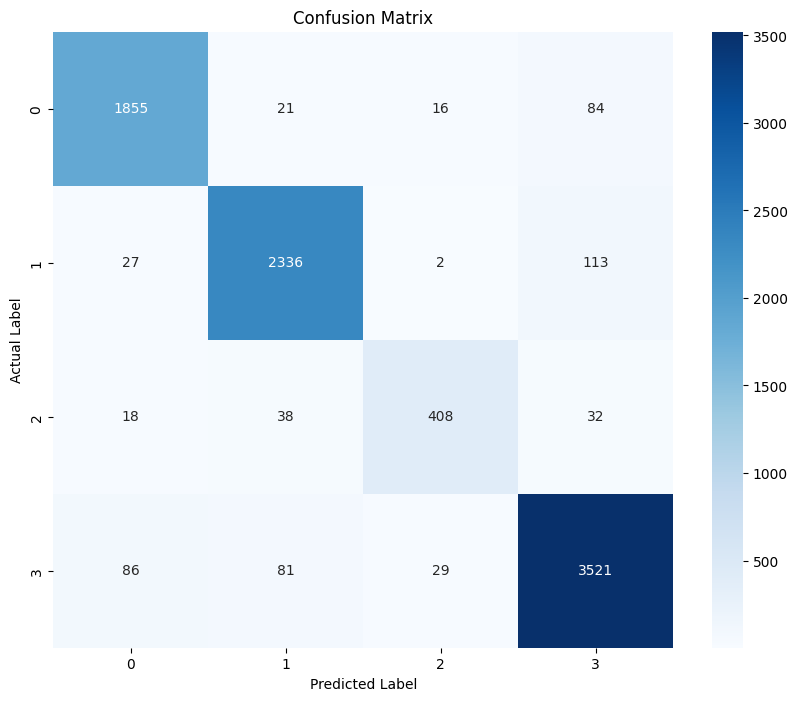

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# a. Visualization of predicted values with a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<font color='orange'>

### Prediction quality assessment (precision/recall/f1-score/ROC-AUC)

</font> 

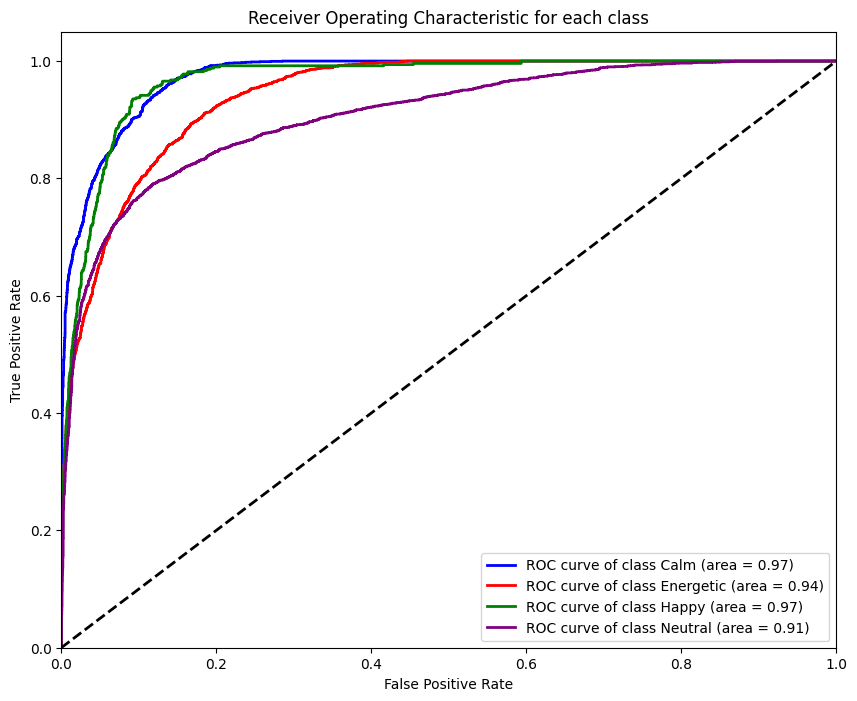

{0: 0.9743921528526143,
 1: 0.9427136536209221,
 2: 0.9672363610881916,
 3: 0.906946897003394}

In [8]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize the y_train and y_test for multi-class ROC AUC calculation
y_train_binarized = label_binarize(y_train, classes=np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Train a OneVsRestClassifier for Logistic Regression to compute ROC AUC
logreg_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
logreg_ovr.fit(X_train_scaled, y_train_binarized)

# Compute ROC AUC Score
roc_auc_ovr = dict()
fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], logreg_ovr.predict_proba(X_test_scaled)[:, i])
    roc_auc_ovr[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = ['blue', 'red', 'green', 'purple']

for i, color in zip(range(y_test_binarized.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(np.unique(y)[i], roc_auc_ovr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

roc_auc_ovr